In [5]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.weightstats import ztest as test

df = pandas.read_csv('data.csv')
df= df.iloc[:,1:]
pandas.options.mode.chained_assignment=None # disable chained copy error(e.g. df[foo]=df[foo]*2)
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [6]:
profile = df[df['target']==1]
dislike = df[df['target']==0]

profile['duration_min']= (profile['duration_ms']/1000)/60
dislike['duration_min']= (dislike['duration_ms']/1000)/60


Musical Feeling


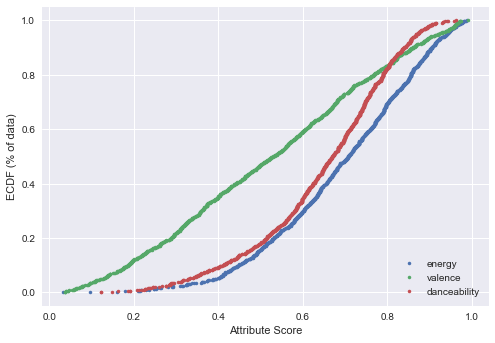

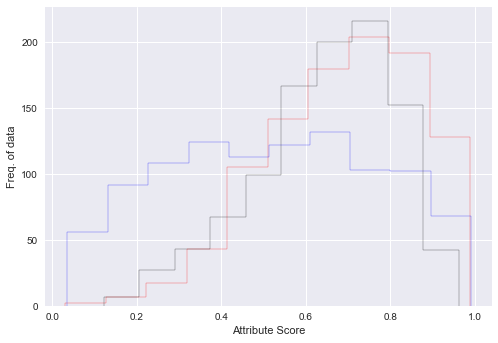

In [7]:
#### feel exploration 
x_en = np.sort(profile.energy)
y_en =np.arange(1,len(x_en)+1)/len(x_en)

x_val = np.sort(profile.valence)
y_val =np.arange(1,len(x_val)+1)/len(x_val)

x_dan = np.sort(profile.danceability)
y_dan =np.arange(1,len(x_dan)+1)/len(x_dan)

_=plt.plot(x_en,y_en,marker='.',linestyle='none')
_=plt.plot(x_val,y_val,marker='.',linestyle='none')
_=plt.plot(x_dan,y_dan,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Attribute Score')
plt.legend(('energy','valence','danceability'),loc='lower right')
print('Musical Feeling')
plt.show()

_ = plt.hist(x=profile.energy,histtype='step',color='Red',alpha=0.9)
_ = plt.hist(x=profile.valence,histtype='step',color='blue',alpha=0.9)
_ = plt.hist(x=profile.danceability,histtype='step',color='black',alpha=0.9)
plt.xlabel('Attribute Score')
plt.ylabel('Freq. of data')
plt.show()

Sound Qualities


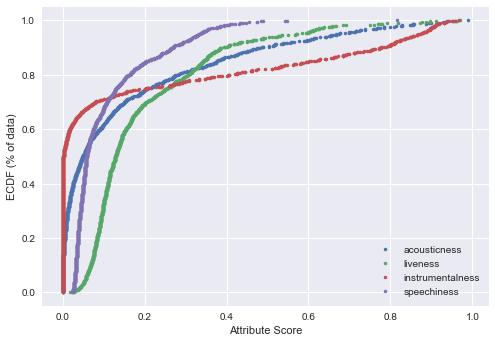

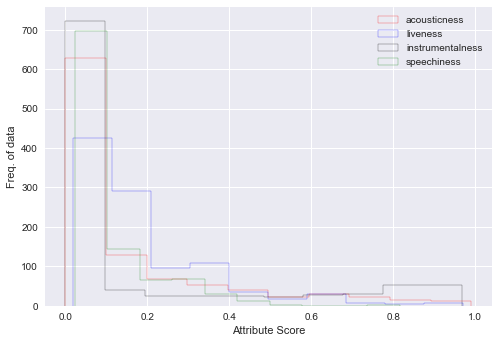

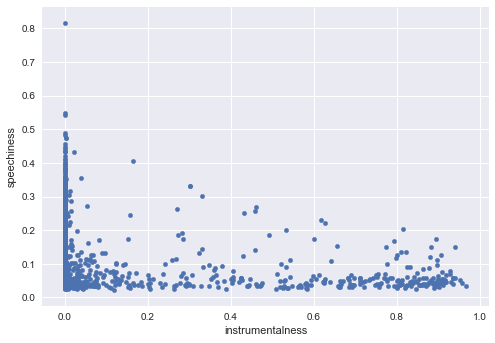

In [9]:
### sound exploration
x_act = np.sort(profile.acousticness)
y_act =np.arange(1,len(x_act)+1)/len(x_act)

x_liv = np.sort(profile.liveness)
y_liv =np.arange(1,len(x_liv)+1)/len(x_liv)

x_inst = np.sort(profile.instrumentalness)
y_inst =np.arange(1,len(x_inst)+1)/len(x_inst)

x_spe = np.sort(profile.speechiness)
y_spe =np.arange(1,len(x_spe)+1)/len(x_spe)

_=plt.plot(x_act,y_act,marker='.',linestyle='none')
_=plt.plot(x_liv,y_liv,marker='.',linestyle='none')
_=plt.plot(x_inst,y_inst,marker='.',linestyle='none')
_=plt.plot(x_spe,y_spe,marker='.',linestyle='none')
plt.ylabel('ECDF (% of data)')
plt.xlabel('Attribute Score')
plt.legend(('acousticness','liveness','instrumentalness','speechiness'),loc='lower right')
print('Sound Qualities')
plt.show()

_ = plt.hist(x=profile.acousticness,histtype='step',color='Red',alpha=0.9)
_ = plt.hist(x=profile.liveness,histtype='step',color='blue',alpha=0.9)
_ = plt.hist(x=profile.instrumentalness,histtype='step',color='black',alpha=0.9)
_ = plt.hist(x=profile.speechiness,histtype='step',color='green',alpha=0.9)
plt.legend(('acousticness','liveness','instrumentalness','speechiness'),loc='upper right')
plt.xlabel('Attribute Score')
plt.ylabel('Freq. of data')
plt.show()

profile.plot(x='instrumentalness',y='speechiness',kind='scatter')
plt.show()

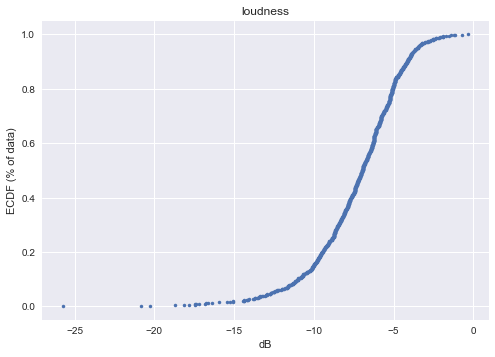

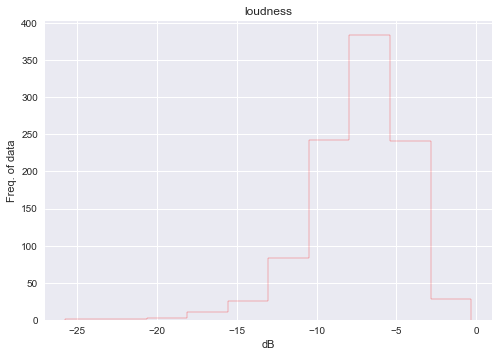

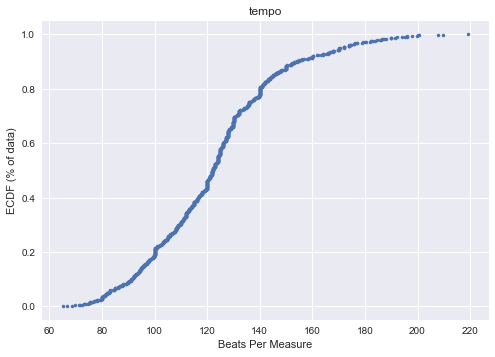

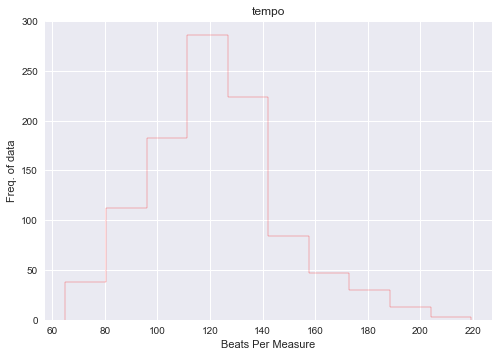

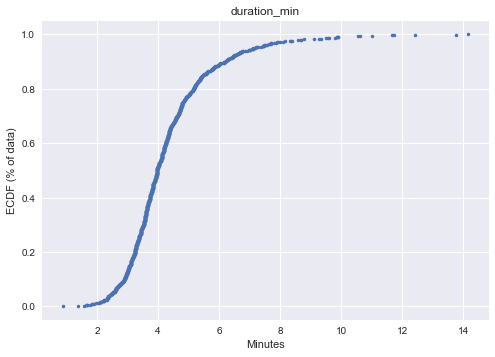

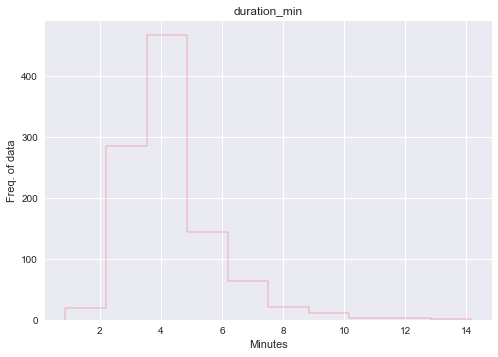

In [18]:
def plots(x,metric): 
    a = np.sort(x)
    b = np.arange(1,len(a)+1)/len(a)

    _=plt.plot(a,b,marker='.',linestyle='none')
    plt.ylabel('ECDF (% of data)')
    plt.xlabel(metric)
    plt.title(x.name)
    plt.show()

    plt.hist(x,histtype='step',color='Red',alpha=0.9)
    plt.xlabel(metric)
    plt.ylabel('Freq. of data')
    plt.title(x.name)
    plt.show()

variables = [profile.loudness,profile.tempo,profile.duration_min]
measures = ['dB','Beats Per Measure','Minutes']

for data,title in zip(variables,measures):
    plots(data,title)




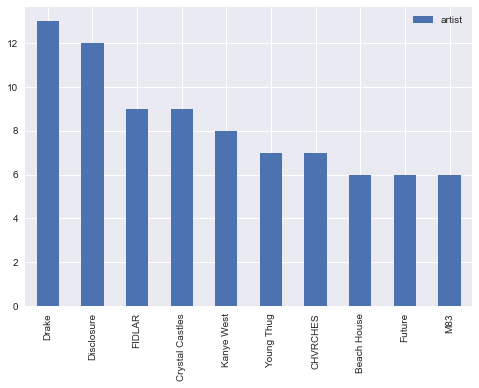

In [19]:
top10artists = pandas.DataFrame(profile['artist'].value_counts())
top10artists = top10artists.iloc[:10]
top10artists.plot(kind='bar')
plt.show()

Technical Music Profile
key


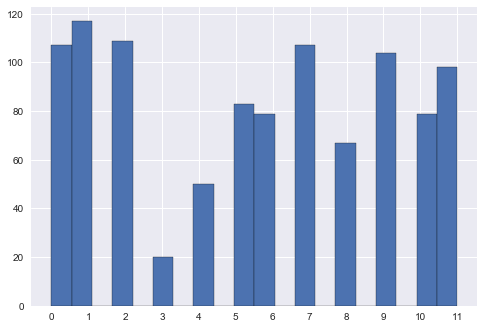

mode


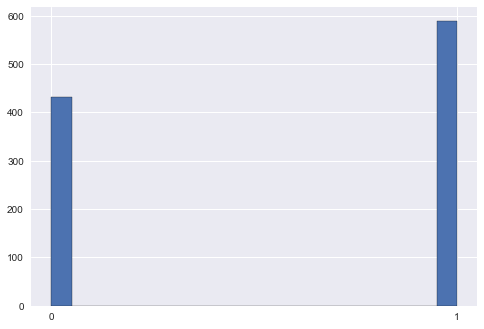

time_signature


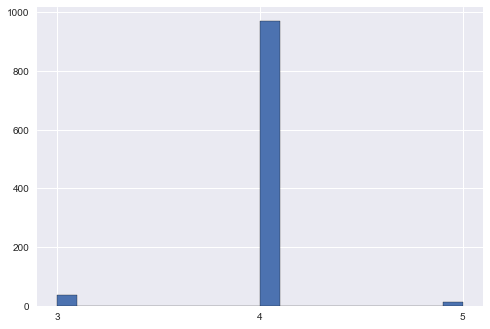

In [10]:
### attribute distrbutions
print('Technical Music Profile')
sns.set()
for att in profile[['key','mode','time_signature']]:
    print(att)
    plt.hist(profile[att],label='key',bins=20,ec='black')## ec puts outlines on the bars
    try:
        plt.xticks(range(profile[att].max()+1))
    except:
        plt.xticks(range(3,int(profile[att].max()+1)))
    plt.show()

In [3]:
print(profile.describe())
print('-------------------------------------------------------')
print(dislike.describe())

       acousticness  danceability    duration_ms       energy  \
count   1020.000000   1020.000000    1020.000000  1020.000000   
mean       0.154279      0.646547  258197.574510     0.689826   
std        0.218645      0.163108   91441.699498     0.175084   
min        0.000003      0.122000   52006.000000     0.031000   
25%        0.008558      0.553500  202116.750000     0.572000   
50%        0.049050      0.670500  238256.500000     0.708000   
75%        0.208750      0.767250  289277.000000     0.832250   
max        0.990000      0.962000  849960.000000     0.989000   

       instrumentalness          key     liveness     loudness         mode  \
count       1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean           0.174486     5.463725     0.194895    -7.353329     0.577451   
std            0.297779     3.668776     0.162592     2.896032     0.494207   
min            0.000000     0.000000     0.018800   -25.756000     0.000000   
25%            0.00

In [4]:
interest_like = profile[['acousticness', 'instrumentalness','time_signature','loudness',
                         'duration_min', 'liveness','speechiness']]
interest_dislike = dislike[['acousticness', 'instrumentalness','time_signature','loudness',
                            'duration_min', 'liveness','speechiness']]

In [21]:
def relate(x,y,scale=1):
# correlate, regress, and plot 2 vars against each other
    corr = np.corrcoef(x,y)
    print('correlation =',corr[0,1])

    slope, intercept = np.polyfit(x,y,1)
    print('slope',slope,'\nintercept', intercept)

    b1 = np.array(np.linspace(0,scale,num=100))
    b0 = slope*b1+intercept
    
    _ = plt.plot(x,y,marker='.',linestyle='none')
    _ = plt.plot(b1,b0,color='Red')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

def compare(x,y):
#Z-test 2 vars and print results
    x = np.array(x)
    y = np.array(y)
    ztest = test(x,y,value=0)
    print('Z-test results : statistic =',ztest[0],'p =',ztest[1])

In [22]:
print(profile.corr('pearson')) # Lou-ene
print('-------------------------------------------------------')
print(dislike.corr('pearson')) # ener-acou,,ener-lou,lou-acou,val-dan

                  acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.123539    -0.096703 -0.356156   
danceability         -0.123539      1.000000     0.119534 -0.073979   
duration_ms          -0.096703      0.119534     1.000000  0.001378   
energy               -0.356156     -0.073979     0.001378  1.000000   
instrumentalness     -0.020760     -0.055504     0.270162  0.040022   
key                  -0.097388      0.017026     0.005276  0.083921   
liveness             -0.038498     -0.156118     0.012051  0.175328   
loudness             -0.303454     -0.013556    -0.191495  0.645639   
mode                  0.006802     -0.003424    -0.098725 -0.013645   
speechiness           0.001094      0.175152    -0.137048 -0.038802   
tempo                -0.056693     -0.136885    -0.065133  0.099907   
time_signature       -0.157641      0.125813     0.003354  0.143114   
valence               0.005714      0.295052    -0.006055  0.252806   
target

In [11]:
for item in interest_dislike:
    print(item,'-----V')
    compare(interest_dislike[item],interest_like[item])
    print('')

acousticness -----V
Z-test results : statistic = 5.86831226497 p = 4.402535123e-09

instrumentalness -----V
Z-test results : statistic = -6.930912097 p = 4.18135823407e-12

time_signature -----V
Z-test results : statistic = -1.80518765955 p = 0.0710453213576

loudness -----V
Z-test results : statistic = 3.24041655026 p = 0.0011935520195

duration_min -----V
Z-test results : statistic = -6.65947130612 p = 2.74814348301e-11

liveness -----V
Z-test results : statistic = -1.18385387194 p = 0.236470912648

speechiness -----V
Z-test results : statistic = -6.99661843711 p = 2.62214122129e-12



# Report
To begin, the data is imported using pandas and split into 2 data frames for comparative analysis: **Profile** for liked songs, and **Dislike** for disliked songs. The duration_ms variable is converted to minutes and the descriptive statistics are computed for both data frames. There are several variables that have considerable differences in their mean between the data frames given their scale: instrumentalness, loudness, and acousticness. These variables are going to be analyzed furthered along with several other variables that were found to have interesting trends in [this](https://github.com/Rene-Sanchez/Data_visualization/blob/master/Data_vis_springboard.ipynb) previous analysis: liveness, speechiness, time_signature, and duration_min.

With the variables of interest determined, 2 new data frames are created with only these variables from their corresponding parent: **interest_like** and **interest_dislike**. I define 2 functions to streamline some of the larger processes that I will be repeating in the analysis to come. The first, named **relate**, correlates the 2 iterables it is given, regresses the first on the second, and plots the resulting regression line on a scatter plot of the data with the axis label after the iterables. The second, named **compare**, performs a Z-test on the iterables it is given and prints the resulting in a label format (I will be using an alpha of .05).

The first analysis begins with generating a correlation matrix for **Profile** and **Dislike**; we find that there are a number of variable combinations that have considerable (>|.4|) correlations in **Dislike**, but only one between loudness and energy in **Profile**. All of these correlations are plotted and measured using the relate function.

We can see from the graphs that there is a very strong linear correlation for loudness-energy and acounticness-energy in **Dislike**.  For the single correlation in **Profile**, it seems that there are a number of outliers that seems to weaken the correlation between the variables energy-loudness.

Next, the variables in **interest_like** and **interest_dislike** are tested for a significant difference in the means of their variables using the **compare** function in a ‘for’ loop. The results of the Z-tests for the variables are printed and we can see that there is a significant difference for all of the variables except liveness and time signature.

To illustrate these differences, the distribution of these variables is plotted on a single histogram using a ‘for’ loop with the interest data frames zipped together.
